<a href="https://colab.research.google.com/github/KIRAN3031/Machine_Learning/blob/main/Linear_Regression/Mutliple_Linear_Regression/Day17%2618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing the required libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = sns.load_dataset("taxis")

## Descriptive analysis


In [ ]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
df.shape

(6433, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [ ]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [ ]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [ ]:
# descriding for the object columns
df.describe(include="object")

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


## Handling the missing data

In [ ]:
df.isna().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [ ]:
(df.isna().sum()/df.shape[0] * 100)

,0
pickup,0.000000
dropoff,0.000000
passengers,0.000000
distance,0.000000
fare,0.000000
tip,0.000000
tolls,0.000000
total,0.000000
color,0.000000
payment,0.683973


In [ ]:
# we can delete the records if the percentage is less than the 10%

((df.shape[0] - df.dropna().shape[0])/df.shape[0]) * 100

1.4301259132597544

In [ ]:
df = df.dropna()

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6337,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6338,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6339,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [ ]:
df.shape

(6341, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [ ]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365


In [ ]:
df.describe(include="object")

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6341,6341,6341,6341,6341,6341
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5373,4546,227,244,5226,5172


## Exploratory Data Analysis


In [ ]:
# target column "tip"
'''
  tip is a numerical column
  and analyze with color feature which is categorical column
'''


'\n  tip is a numerical column\n  and analyze with color feature which is categorical column\n'

In [ ]:
df.color.value_counts()


,count
color,
yellow,5373
green,968


### Graphical Analysis


/tmp/ipython-input-1058057580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.color, y=df.tip,estimator='std',palette=["yellow",'darkgreen'])


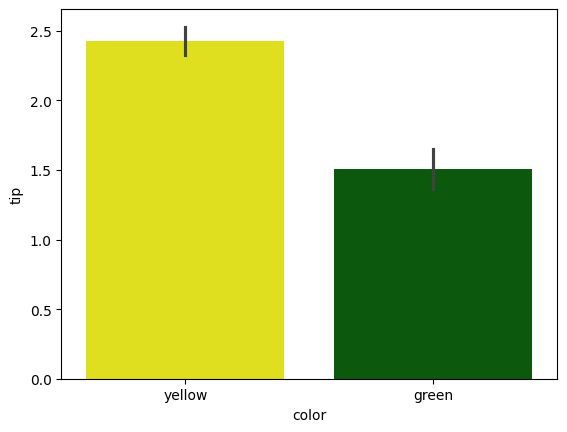

In [ ]:
# graphical analysis of categorical
sns.barplot(x=df.color, y=df.tip,estimator='std',palette=["yellow",'darkgreen'])
plt.show()

/tmp/ipython-input-1942021526.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.color, y=df.tip, estimator='mean',palette=["yellow",'darkgreen'])


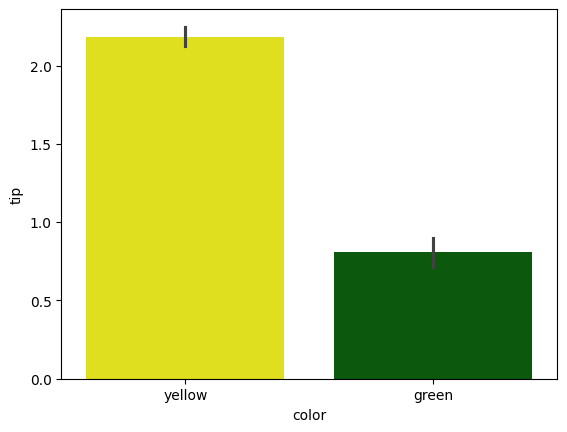

In [ ]:
sns.barplot(x=df.color, y=df.tip, estimator='mean',palette=["yellow",'darkgreen'])
plt.show()

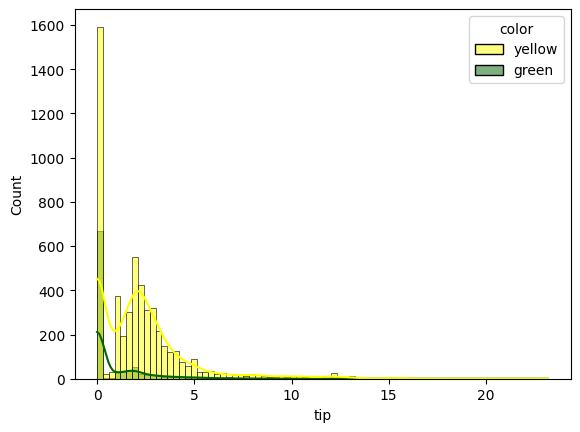

In [ ]:
sns.histplot(x=df.tip, hue=df.color,kde= True,palette=["yellow",'darkgreen'])
plt.show()

### Hypotheses Testing:


#### T - Test
    . H0 : distribution of tip for yellow = ditribution of tip for green
    . H1 : distribution of tip for yellow != ditribution of tip for green

In [ ]:
yellow_tip= df[df['color']=='Yellow']['tip']
green_tip= df[df['color']=='Green']['tip']

In [ ]:
# Independent T-Test
from scipy import stats


t_stat, p_val = stats.ttest_ind(yellow_tip, green_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by color")
else:
    print("Fail to reject null hypothesis: No significant tips difference by color")


Independent T-Test statistic: nan
P-value: nan
Fail to reject null hypothesis: No significant tips difference by color


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [ ]:
# target column "tip"
'''
  tip is a numerical column
  and analyze with payment feature which is categorical column
'''

'\n  tip is a numerical column\n  and analyze with payment feature which is categorical column\n'

In [ ]:
df.payment.value_counts()

,count
payment,
credit card,4546
cash,1795


/tmp/ipython-input-3758148356.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.payment, y=df.tip,estimator='std',palette=["orange",'green'])
/tmp/ipython-input-3758148356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.payment, y=df.tip, estimator='mean',palette=["orange",'green'])


<Axes: xlabel='tip', ylabel='Count'>

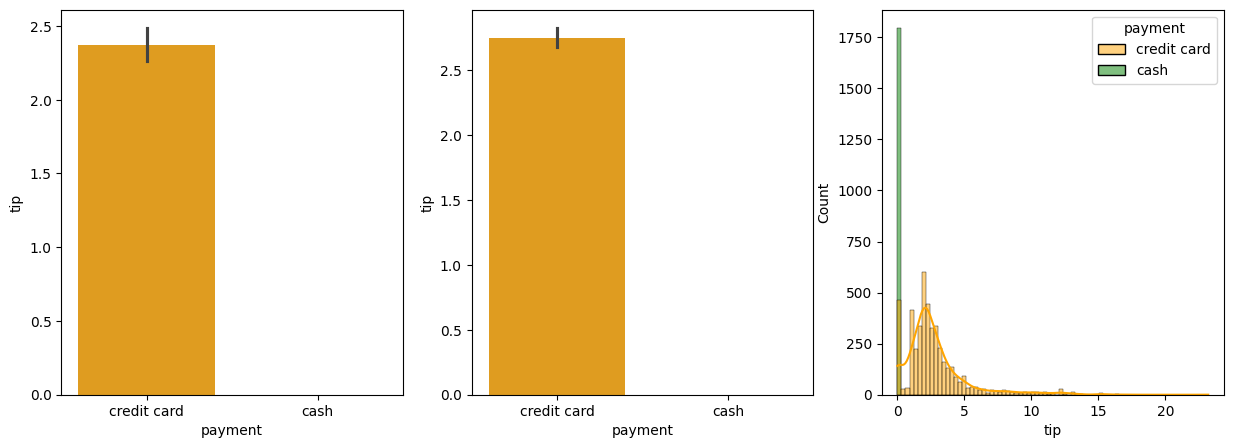

In [ ]:
# graphical analysis of categorical
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(x=df.payment, y=df.tip,estimator='std',palette=["orange",'green'])

plt.subplot(1,3,2)
sns.barplot(x=df.payment, y=df.tip, estimator='mean',palette=["orange",'green'])

plt.subplot(1,3,3)
sns.histplot(x=df.tip, hue=df.payment,kde= True,palette=["orange",'green'])

#### T - Test 2
    . H0 : distribution of tip for credit card = ditribution of tip for cash
    . H1 : distribution of tip for credit card != ditribution of tip for cash

In [ ]:
credit_card_tip= df[df['payment']=='credit card']['tip']
cash_tip= df[df['payment']=='cash']['tip']

In [ ]:
from scipy import stats


t_stats, p_vals = stats.ttest_ind(credit_card_tip, cash_tip)
print("Independent T-Test statistic:", t_stats)
print("P-value:", p_vals)

if p_vals < 0.05:
    print("Reject null hypothesis: tips differs by payment")
else:
    print("Fail to reject null hypothesis: No significant tips difference by payment")

Independent T-Test statistic: 49.09538452722153
P-value: 0.0
Reject null hypothesis: tips differs by payment


In [ ]:
df.describe(include='object')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6341,6341,6341,6341,6341,6341
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5373,4546,227,244,5226,5172


In [ ]:
df['pickup_borough'].value_counts()

,count
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


/tmp/ipython-input-1729642190.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['pickup_borough'],palette='rocket')


<Axes: xlabel='pickup_borough', ylabel='count'>

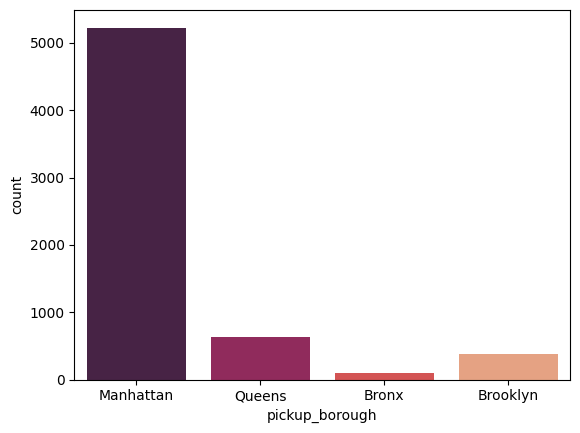

In [ ]:
sns.countplot(data=df,x=df['pickup_borough'],palette='rocket')

/tmp/ipython-input-1304010712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pickup_borough'],y=df['tip'],estimator='std',palette='rocket')
/tmp/ipython-input-1304010712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pickup_borough'],y=df['tip'],estimator='mean',palette='rocket')


<Axes: xlabel='pickup_borough', ylabel='tip'>

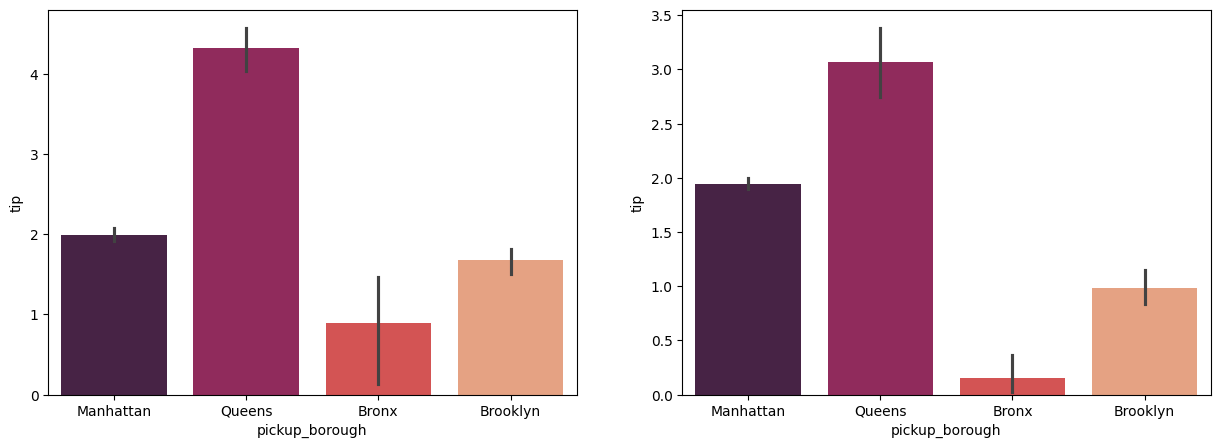

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df['pickup_borough'],y=df['tip'],estimator='std',palette='rocket')
plt.subplot(1,2,2)
sns.barplot(x=df['pickup_borough'],y=df['tip'],estimator='mean',palette='rocket')

In [ ]:
df.groupby('pickup_borough')['tip'].std()

,tip
pickup_borough,
Bronx,0.897261
Brooklyn,1.674487
Manhattan,1.997736
Queens,4.323951


<Axes: xlabel='tip', ylabel='Count'>

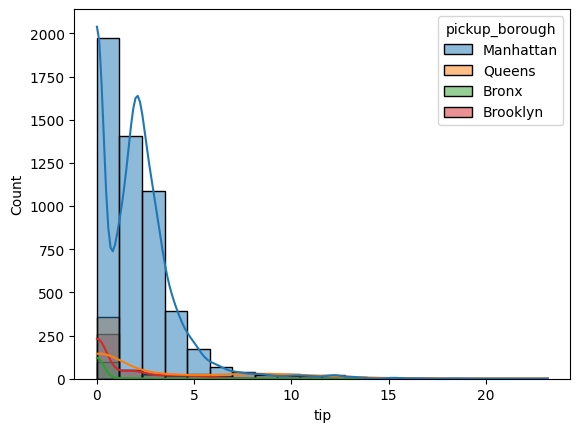

In [ ]:
sns.histplot(hue=df['pickup_borough'],x=df['tip'],kde=True,bins=20)

#### Annova Test
    . H0 : distribution of tips is the same across all pickup_borough categories
    . H1 : At least one category has a different distribution of tip across pickup_borough categories

In [ ]:
df['pickup_borough'].unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

In [ ]:
manhattan_tip= df[df['pickup_borough']=='Manhattan']['tip']
queens_tip= df[df['pickup_borough']=='Queens']['tip']
bronx_tip=df['tip'][df['pickup_borough'] == 'Bronx']
brooklyn_tip=df['tip'][df['pickup_borough'] == 'Brooklyn']

In [ ]:
# ANOVA Test
f_stat, p_val = stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by pickup_borough")
else:
    print("Fail to reject null hypothesis: No significant difference by pickup_borough")



ANOVA F-statistic: 91.5793383185057
P-value: 5.155109332422435e-58
Reject null hypothesis: tips differs by pickup_borough


#### Hypothese for Tukey test (for each pair of groups):
    . H0 : distribution of group1 = distribution of group2
    . H1 : distribution of group2 != distribution of group2

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# perform tukey HSD
tukey_results = pairwise_tukeyhsd(endog=df['tip'], groups=df['pickup_borough'], alpha=0.05)
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.1595 1.5015   True
    Bronx Manhattan    1.797   0.0  1.194    2.4   True
    Bronx    Queens   2.9179   0.0 2.2759 3.5599   True
 Brooklyn Manhattan   0.9665   0.0 0.6499  1.283   True
 Brooklyn    Queens   2.0873   0.0 1.7016 2.4731   True
Manhattan    Queens   1.1209   0.0 0.8716 1.3701   True
-------------------------------------------------------


In [ ]:
df['dropoff_borough'].value_counts()

,count
dropoff_borough,
Manhattan,5172
Queens,534
Brooklyn,497
Bronx,136
Staten Island,2


/tmp/ipython-input-1649707523.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['dropoff_borough'],palette='rocket')


<Axes: xlabel='dropoff_borough', ylabel='count'>

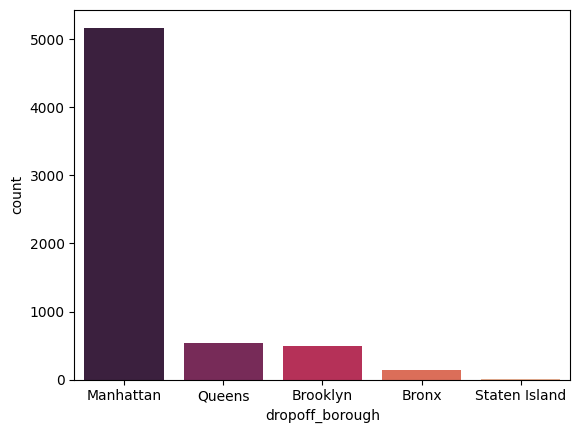

In [ ]:
sns.countplot(data=df,x=df['dropoff_borough'],palette='rocket')

/tmp/ipython-input-1038071405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['dropoff_borough'],y=df['tip'],estimator='std',palette='rocket')
/tmp/ipython-input-1038071405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['dropoff_borough'],y=df['tip'],estimator='mean',palette='rocket')


<Axes: xlabel='tip', ylabel='Count'>

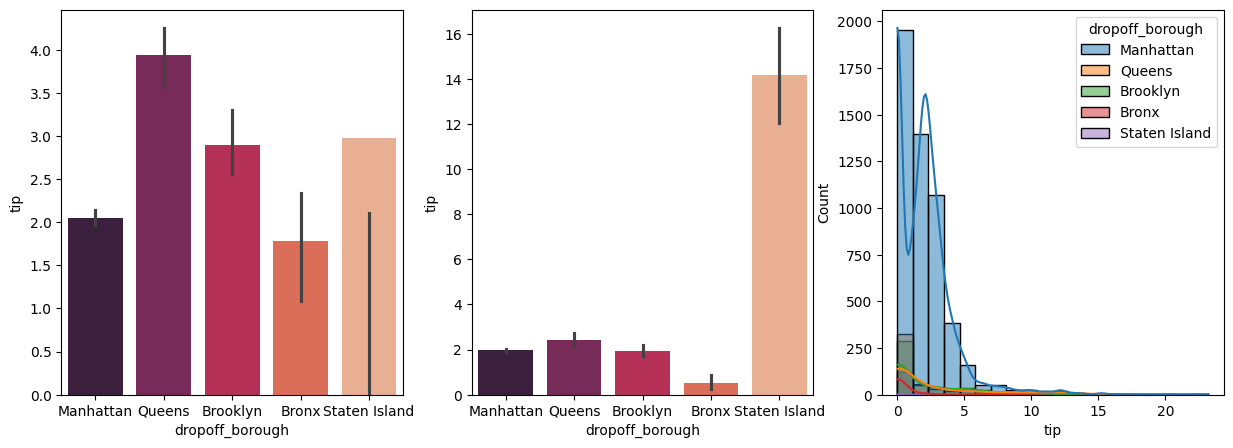

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=df['dropoff_borough'],y=df['tip'],estimator='std',palette='rocket')
plt.subplot(1,3,2)
sns.barplot(x=df['dropoff_borough'],y=df['tip'],estimator='mean',palette='rocket')
plt.subplot(1,3,3)
sns.histplot(hue=df['dropoff_borough'],x=df['tip'],kde=True,bins=20)

#### Annova Test 2
    . H0 : distribution of tips is the same across all dropoff_borough categories
    . H1 : At least one category has a different distribution of tip across dropoff_borough categories

In [ ]:
df['dropoff_borough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
manhattan_tip1= df[df['dropoff_borough']=='Manhattan']['tip']
queens_tip1= df[df['dropoff_borough']=='Queens']['tip']
bronx_tip1=df['tip'][df['dropoff_borough'] == 'Bronx']
brooklyn_tip1=df['tip'][df['dropoff_borough'] == 'Brooklyn']
staten_tip1=df['tip'][df['dropoff_borough'] == 'Staten Island']

In [ ]:
# ANOVA Test
f_stat, p_val = stats.f_oneway(manhattan_tip1,queens_tip1,bronx_tip1,brooklyn_tip1,staten_tip1)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by dropoff_borough")
else:
    print("Fail to reject null hypothesis: No significant difference by dropoff_borough")



ANOVA F-statistic: 31.42417796696829
P-value: 5.87859571331583e-26
Reject null hypothesis: tips differs by dropoff_borough


#### Hypothese for Tukey test (for each pair of groups):
    . H0 : distribution of group1 = distribution of group2
    . H1 : distribution of group2 != distribution of group2

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform tukey HSD
tukey_results = pairwise_tukeyhsd(endog=df['tip'], groups=df['dropoff_borough'], alpha=0.05)
print(tukey_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------------------


In [ ]:
df['pickup_zone'].value_counts()

,count
pickup_zone,
Midtown Center,227
Penn Station/Madison Sq West,209
Clinton East,208
Upper East Side South,208
Midtown East,196
...,...
Ozone Park,1
Glendale,1
Woodlawn/Wakefield,1


In [ ]:
df['dropoff_zone'].value_counts()

,count
dropoff_zone,
Upper East Side North,244
Murray Hill,217
Midtown Center,215
Midtown East,175
Upper East Side South,173
...,...
Queensboro Hill,1
Homecrest,1
Madison,1


<Axes: xlabel='dropoff_zone', ylabel='count'>

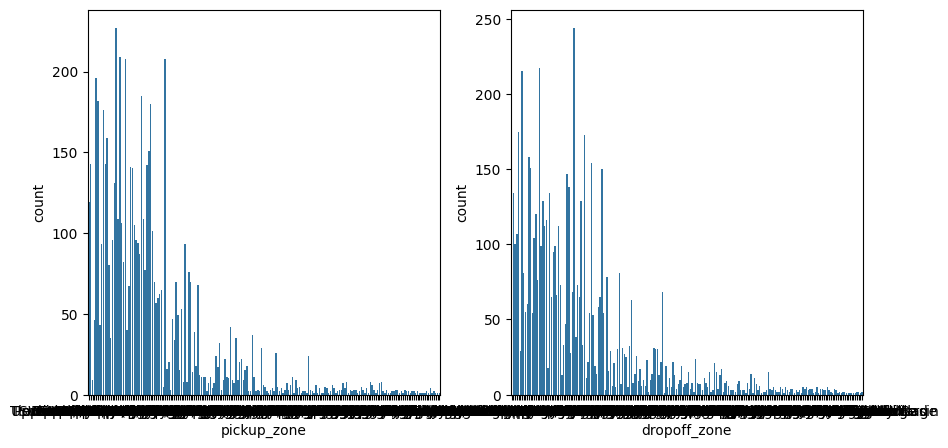

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df['pickup_zone'])
plt.subplot(1,2,2)
sns.countplot(x=df['dropoff_zone'])

#### Annova Test 3
    . H0 : distribution of tips is the same across all pickup_zone categories
    . H1 : At least one category has a different distribution of tip across pickup_zone categories

In [ ]:
# ANOVA Test
categories = [group['tip'].values for name,group in df.groupby('pickup_zone')]
f_stat, p_val = stats.f_oneway(*categories)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by pickup_zone")
else:
    print("Fail to reject null hypothesis: No significant difference by pickup_zone")


ANOVA F-statistic: 7.563376210961916
P-value: 7.892434822136223e-169
Reject null hypothesis: tips differs by pickup_zone


#### Annova Test 3
    . H0 : distribution of tips is the same across all dropoff_zone categories
    . H1 : At least one category has a different distribution of tip across dropoff_zone categories


In [ ]:
# ANOVA Test
categories = [group['tip'].values for name,group in df.groupby('dropoff_zone')]
f_stat, p_val = stats.f_oneway(*categories)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by dropoff_zone")
else:
    print("Fail to reject null hypothesis: No significant difference by dropoff_zone")


ANOVA F-statistic: 5.76903467327541
P-value: 1.3107168403745948e-120
Reject null hypothesis: tips differs by dropoff_zone


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

<Axes: xlabel='distance', ylabel='Count'>

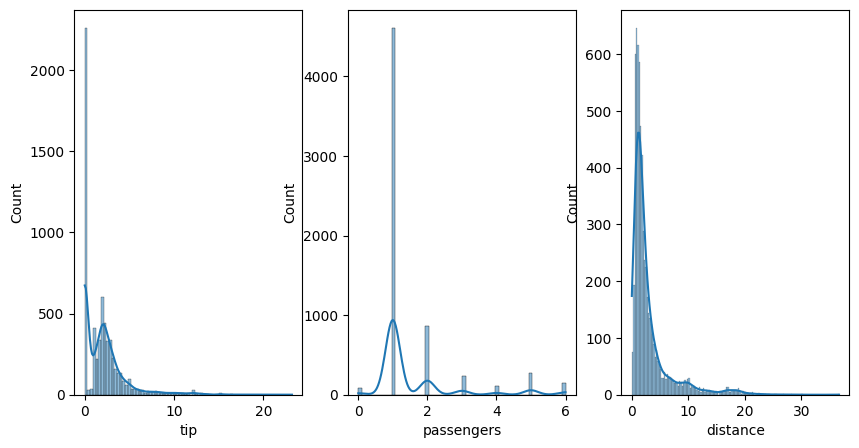

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.histplot(df['tip'],kde=True)
plt.subplot(1,3,2)
sns.histplot(df['passengers'],kde=True)
plt.subplot(1,3,3)
sns.histplot(df['distance'],kde=True)


<Axes: xlabel='tip', ylabel='passengers'>

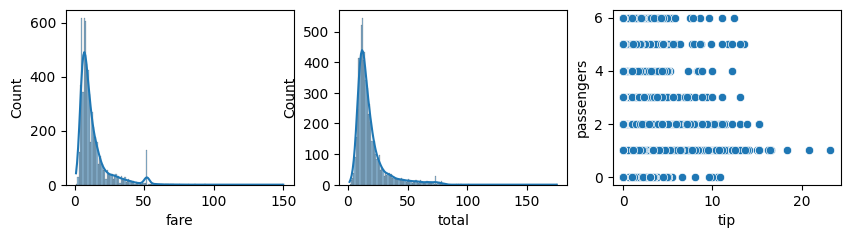

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,4)
sns.histplot(df['fare'],kde=True)
plt.subplot(2,3,5)
sns.histplot(df['total'],kde=True)
plt.subplot(2,3,6)
sns.scatterplot(data=df,x=df['tip'],y=df['passengers'])


#### Hypothese for correlation for numberic variables:
    . H0 : correlation is zero
    . H1 : There is significant correlation (not zero)

In [ ]:
df['passengers'].skew()

np.float64(2.349366327837006)

In [ ]:
df['passengers'].kurtosis()

np.float64(4.8167003036423175)

In [ ]:
r, p_val = stats.spearmanr(df['tip'], df['passengers'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlationa")

Spearman's rank correlation coefficient: 0.027509812818779178
P-value: 0.028480753176042872
Reject null hypothesis: There is significant correlation


<Axes: xlabel='tip', ylabel='fare'>

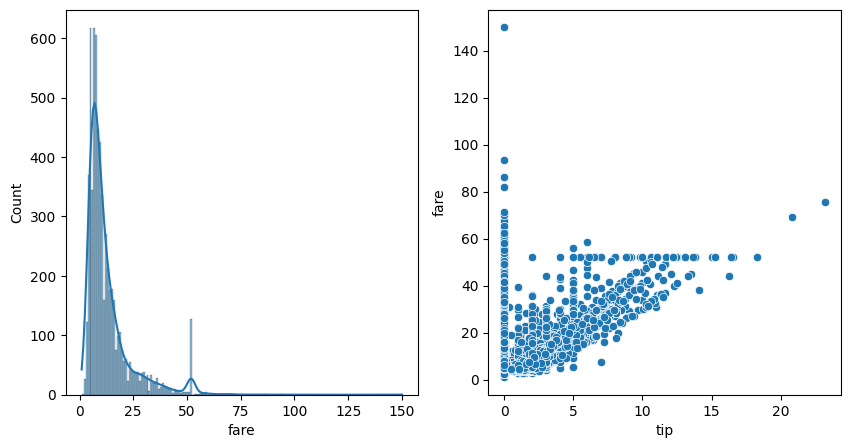

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['fare'],kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['tip'],y=df['fare'])

In [ ]:
df['fare'].skew()

np.float64(2.606558389580325)

In [ ]:
df['fare'].kurtosis()

np.float64(10.170827993181963)

In [ ]:
r, p_val = stats.spearmanr(df['tip'], df['fare'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlationa")

Spearman's rank correlation coefficient: 0.310254279563729
P-value: 1.5556730728881364e-141
Reject null hypothesis: There is significant correlation


<Axes: xlabel='tip', ylabel='distance'>

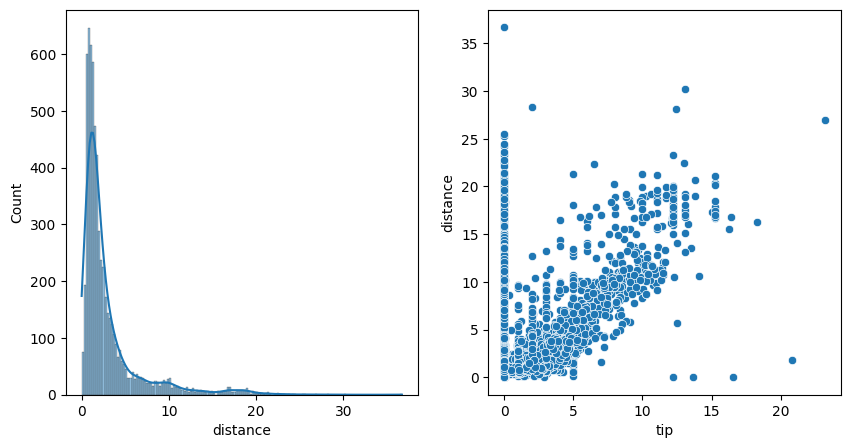

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['distance'],kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['tip'],y=df['distance'])

In [ ]:
df['distance'].skew()

np.float64(2.8870233381954415)

In [ ]:
df['distance'].kurtosis()

np.float64(9.793001481080482)

In [ ]:
r, p_val = stats.spearmanr(df['tip'], df['distance'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlationa")

Spearman's rank correlation coefficient: 0.29265085410043695
P-value: 1.9411181331374707e-125
Reject null hypothesis: There is significant correlation


<Axes: xlabel='tip', ylabel='total'>

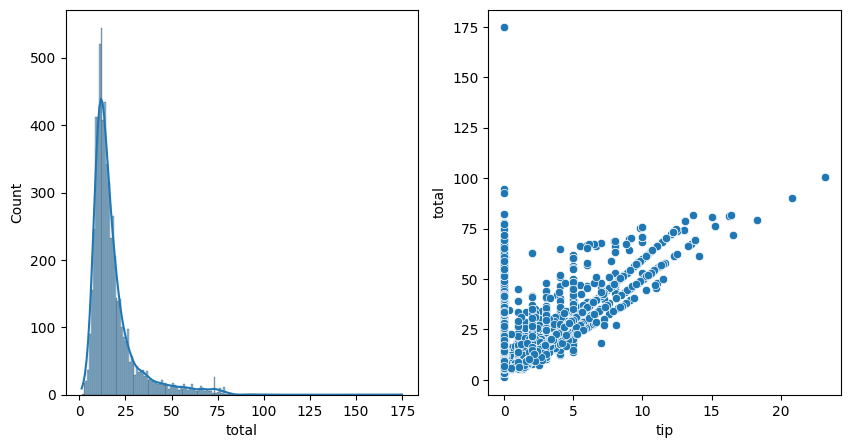

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['total'],kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['tip'],y=df['total'])

In [ ]:
df['distance'].skew()

np.float64(2.8870233381954415)

In [ ]:
df['distance'].kurtosis()

np.float64(9.793001481080482)

In [ ]:
r, p_val = stats.spearmanr(df['tip'], df['distance'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlation")

Spearman's rank correlation coefficient: 0.29265085410043695
P-value: 1.9411181331374707e-125
Reject null hypothesis: There is significant correlation


<Axes: xlabel='tip', ylabel='tolls'>

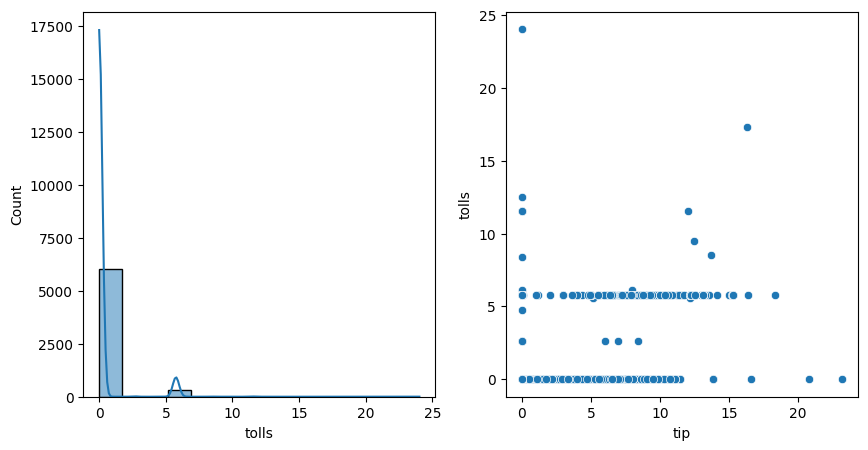

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['tolls'],kde=True)
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['tip'],y=df['tolls'])

In [ ]:
df['tolls'].skew()

np.float64(4.876125068610457)

In [ ]:
df['tolls'].kurtosis()

np.float64(32.159491595605495)

In [ ]:
'''
if - 0.5 >= skew <= + 0.5 then it is symmetric (Normal) go for the pearson correlation else go for spearman correlation
if kurtosis <= 3 then go for the pearson correlation else go for spearman correlation
'''


'\nif - 0.5 >= skew <= + 0.5 then it is symmetric (Normal) go for the pearson correlation else go for spearman correlation\nif kurtosis <= 3 then go for the pearson correlation else go for spearman correlation\n'

In [ ]:
r, p_val = stats.spearmanr(df['tip'], df['tolls'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlation")

Spearman's rank correlation coefficient: 0.175380002891528
P-value: 5.643276180955435e-45
Reject null hypothesis: There is significant correlation


In [ ]:
nm = df[['fare','tip','total','distance','passengers']]

<Axes: >

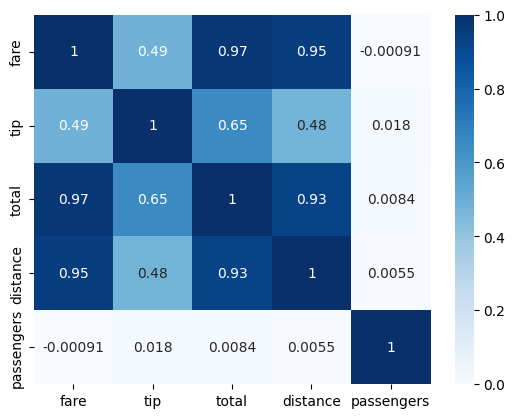

In [ ]:
sns.heatmap(nm.corr(),annot=True, cmap = 'Blues')

In [ ]:
df['pickup']

,pickup
0,2019-03-23 20:21:09
1,2019-03-04 16:11:55
2,2019-03-27 17:53:01
3,2019-03-10 01:23:59
4,2019-03-30 13:27:42
...,...
6336,2019-03-31 09:51:53
6337,2019-03-31 17:38:00
6338,2019-03-23 22:55:18
6339,2019-03-04 10:09:25


In [ ]:
df['pickup'].dt.month

,pickup
0,3
1,3
2,3
3,3
4,3
...,...
6336,3
6337,3
6338,3
6339,3


In [ ]:
df['pickup'].dt.day

,pickup
0,23
1,4
2,27
3,10
4,30
...,...
6336,31
6337,31
6338,23
6339,4


In [ ]:
df['pickup'].dt.month_name().unique()

array(['March', 'February'], dtype=object)

In [ ]:
len(df['pickup'].dt.day.unique())

31

In [ ]:
df['pickup'].dt.quarter.unique()

array([1], dtype=int32)

In [ ]:
df['pickup'].dt.year.unique()

array([2019], dtype=int32)

In [ ]:
len(df['pickup'].dt.day_name().unique())

7

In [ ]:
len(df['pickup'].unique())

6322

In [ ]:
df['pickup_month']=df['pickup'].dt.month_name()

In [ ]:
df['pickup_year']=df['pickup'].dt.year

In [ ]:
df['pickup_day']=df['pickup'].dt.day

In [ ]:
df['pickup_dayname']=df['pickup'].dt.day_name()

In [ ]:
df['pickup_hour']=df['pickup'].dt.hour

In [ ]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_month,pickup_year,pickup_day,pickup_dayname,pickup_hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,March,2019,23,Saturday,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,March,2019,4,Monday,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,March,2019,27,Wednesday,17
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,March,2019,10,Sunday,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,March,2019,30,Saturday,13


In [ ]:
df['dropoff_month']=df['dropoff'].dt.month_name()

In [ ]:
df['dropoff_year']=df['dropoff'].dt.year

In [ ]:
df['dropoff_dayname']=df['dropoff'].dt.day_name()

In [ ]:
df['dropoff_hour']=df['dropoff'].dt.hour

In [ ]:
df['dropoff_minute']=df['dropoff'].dt.minute

In [ ]:
df['dropoff_second']=df['dropoff'].dt.second

In [ ]:
df['dropoff_quarter'] = df['dropoff'].dt.quarter

In [ ]:
df['dropoff_day'] = df['dropoff'].dt.day

## EDA

In [ ]:
df.describe(include=object)

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_month,pickup_dayname,dropoff_month,dropoff_dayname
count,6341,6341,6341,6341,6341,6341,6341,6341,6341,6341
unique,2,2,194,203,4,5,2,7,3,7
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan,March,Friday,March,Friday
freq,5373,4546,227,244,5226,5172,6340,1091,6339,1083


In [ ]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,pickup_year,pickup_day,pickup_hour,dropoff_year,dropoff_hour,dropoff_minute,dropoff_second,dropoff_quarter,dropoff_day
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.0,6341.000000,6341.000000,6341.0,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263,2019.0,15.758871,13.899227,2019.0,13.941019,30.070967,29.396152,1.000158,15.761867
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000,2019.0,1.000000,0.000000,2019.0,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000,2019.0,8.000000,10.000000,2019.0,10.000000,15.000000,14.000000,1.000000,8.000000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000,2019.0,15.000000,15.000000,2019.0,15.000000,30.000000,30.000000,1.000000,15.000000
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000,2019.0,23.000000,19.000000,2019.0,19.000000,45.000000,44.000000,1.000000,23.000000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000,2019.0,31.000000,23.000000,2019.0,23.000000,59.000000,59.000000,2.000000,31.000000
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365,0.0,8.888108,6.052512,0.0,6.128049,17.330122,17.230415,0.012558,8.886406


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
 14  pickup_month     6341 non-null   object 

#### EDA for the categorical columns(new)

In [ ]:
df.describe(include=object)

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_month,pickup_dayname,dropoff_month,dropoff_dayname
count,6341,6341,6341,6341,6341,6341,6341,6341,6341,6341
unique,2,2,194,203,4,5,2,7,3,7
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan,March,Friday,March,Friday
freq,5373,4546,227,244,5226,5172,6340,1091,6339,1083


In [ ]:
'''
pickup_dayname
dropoff_dayname
pickup_month
dropoff_month
'''

'\npickup_dayname\ndropoff_dayname\npickup_month\ndropoff_month\n'

In [ ]:
df['pickup_dayname'].value_counts()

,count
pickup_dayname,
Friday,1091
Saturday,1028
Wednesday,958
Thursday,896
Sunday,857
Tuesday,811
Monday,700


/tmp/ipython-input-4063263496.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['pickup_dayname'],palette='rocket')


<Axes: xlabel='pickup_dayname', ylabel='count'>

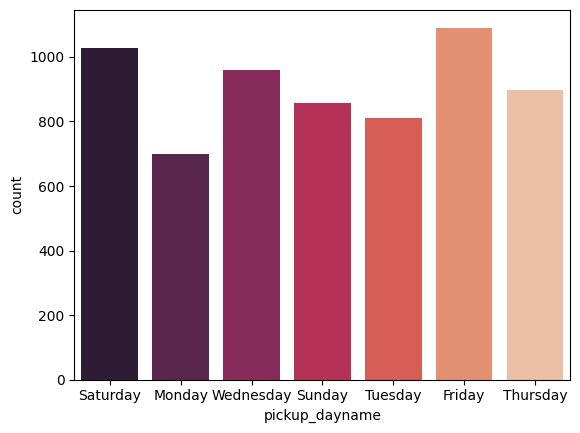

In [ ]:
sns.countplot(data=df,x=df['pickup_dayname'],palette='rocket')

/tmp/ipython-input-1349993527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pickup_dayname'],y=df['tip'],estimator='std',palette='rocket')
/tmp/ipython-input-1349993527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pickup_dayname'],y=df['tip'],estimator='mean',palette='rocket')


<Axes: xlabel='tip', ylabel='Count'>

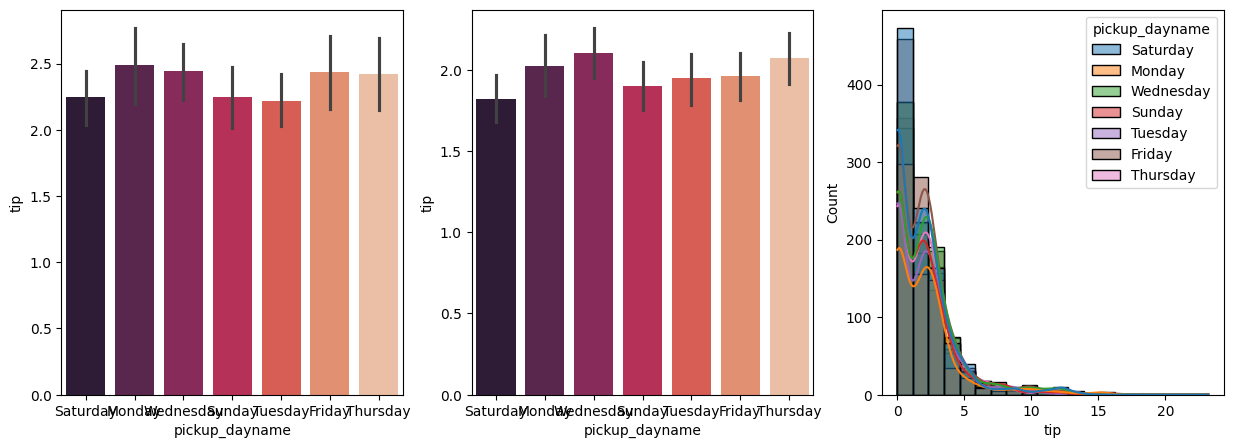

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=df['pickup_dayname'],y=df['tip'],estimator='std',palette='rocket')
plt.subplot(1,3,2)
sns.barplot(x=df['pickup_dayname'],y=df['tip'],estimator='mean',palette='rocket')
plt.subplot(1,3,3)
sns.histplot(hue=df['pickup_dayname'],x=df['tip'],kde=True,bins=20)

##### Annova Test (pickup_dayname)
    . H0 : distribution of tips is the same across all pickup_dayname categories
    . H1 : At least one category has a different distribution of tip across pickup_dayname categories

In [ ]:
df.pickup_dayname.unique()

array(['Saturday', 'Monday', 'Wednesday', 'Sunday', 'Tuesday', 'Friday',
       'Thursday'], dtype=object)

In [ ]:
Saturday_tip = df['tip'][df['pickup_dayname']=='Saturday']
Sunday_tip = df['tip'][df['pickup_dayname']=='Sunday']
Monday_tip = df['tip'][df['pickup_dayname']=='Monday']
Tuesday_tip = df['tip'][df['pickup_dayname']=='Tuesday']
Wednesday_tip = df['tip'][df['pickup_dayname']=='Wednesday']
Thursday_tip = df['tip'][df['pickup_dayname']=='Thursday']
Friday_tip=df['tip'][df['pickup_dayname']=='Friday']

In [ ]:

# ANOVA Test
f_stat, p_val = stats.f_oneway(Saturday_tip, Sunday_tip, Monday_tip, Tuesday_tip, Wednesday_tip, Thursday_tip, Friday_tip)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by pickup_dayname")
else:
    print("Fail to reject null hypothesis: No significant difference by pickup_dayname")

ANOVA F-statistic: 1.6689152148182254
P-value: 0.1242843162257308
Fail to reject null hypothesis: No significant difference by pickup_dayname


/tmp/ipython-input-4011791596.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['dropoff_dayname'],palette='rocket')


<Axes: xlabel='dropoff_dayname', ylabel='count'>

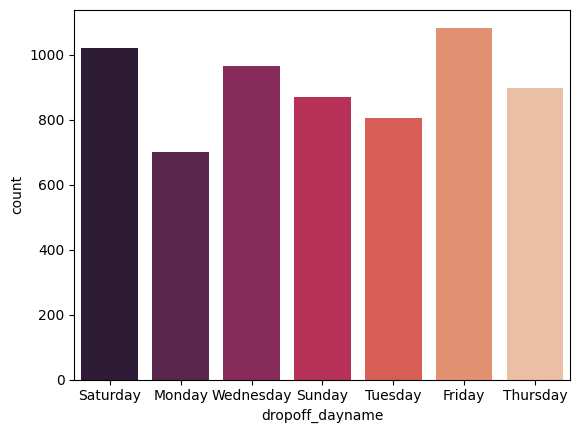

In [ ]:
sns.countplot(data=df,x=df['dropoff_dayname'],palette='rocket')

/tmp/ipython-input-3728747563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['dropoff_dayname'],y=df['tip'],estimator='std',palette='rocket')
/tmp/ipython-input-3728747563.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['dropoff_dayname'],y=df['tip'],estimator='mean',palette='rocket')


<Axes: xlabel='tip', ylabel='Count'>

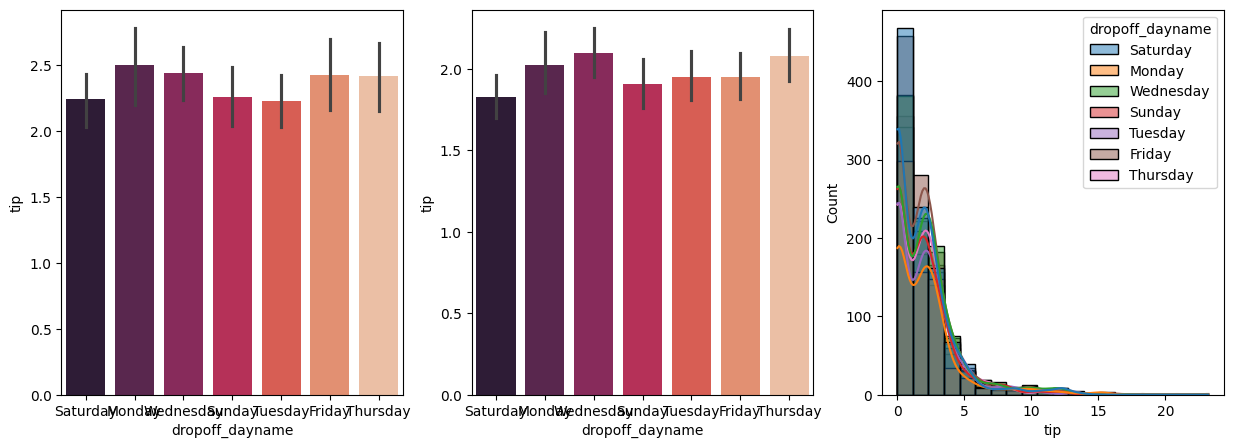

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=df['dropoff_dayname'],y=df['tip'],estimator='std',palette='rocket')
plt.subplot(1,3,2)
sns.barplot(x=df['dropoff_dayname'],y=df['tip'],estimator='mean',palette='rocket')
plt.subplot(1,3,3)
sns.histplot(hue=df['dropoff_dayname'],x=df['tip'],kde=True,bins=20)

##### Annova Test 2 (dropoff_dayname)
    . H0 : distribution of tips is the same across all dropoff_dayname categories
    . H1 : At least one category has a different distribution of tip across dropoff_dayname categories

In [ ]:
df.dropoff_dayname.unique()

array(['Saturday', 'Monday', 'Wednesday', 'Sunday', 'Tuesday', 'Friday',
       'Thursday'], dtype=object)

In [ ]:
Saturday_tip1 = df['tip'][df['dropoff_dayname']=='Saturday']
Sunday_tip1 = df['tip'][df['dropoff_dayname']=='Sunday']
Monday_tip1 = df['tip'][df['dropoff_dayname']=='Monday']
Tuesday_tip1 = df['tip'][df['dropoff_dayname']=='Tuesday']
Wednesday_tip1 = df['tip'][df['dropoff_dayname']=='Wednesday']
Thursday_tip1 = df['tip'][df['dropoff_dayname']=='Thursday']
Friday_tip1=df['tip'][df['dropoff_dayname']=='Friday']

In [ ]:

# ANOVA Test
f_stat, p_val = stats.f_oneway(Saturday_tip1, Sunday_tip1, Monday_tip1, Tuesday_tip1, Wednesday_tip1, Thursday_tip1, Friday_tip1)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by pickup_dayname")
else:
    print("Fail to reject null hypothesis: No significant difference by pickup_dayname")

ANOVA F-statistic: 1.619009669473555
P-value: 0.13742247930087778
Fail to reject null hypothesis: No significant difference by pickup_dayname


In [ ]:
df['pickup_month'].value_counts()

,count
pickup_month,
March,6340
February,1


/tmp/ipython-input-1881930182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.pickup_month, y=df.tip,estimator='std',palette=["yellow",'darkgreen'])


<Axes: xlabel='pickup_month', ylabel='tip'>

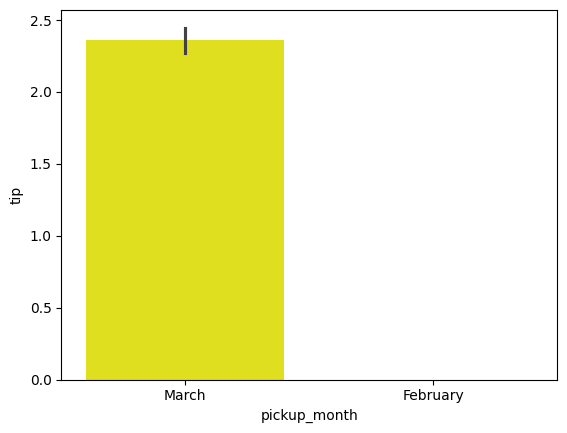

In [ ]:
sns.barplot(x=df.pickup_month, y=df.tip,estimator='std',palette=["yellow",'darkgreen'])

/tmp/ipython-input-2506080035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pickup_month'],y=df['tip'],estimator='std',palette='rocket')
/tmp/ipython-input-2506080035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['pickup_month'],y=df['tip'],estimator='mean',palette='rocket')


<Axes: xlabel='tip', ylabel='Count'>

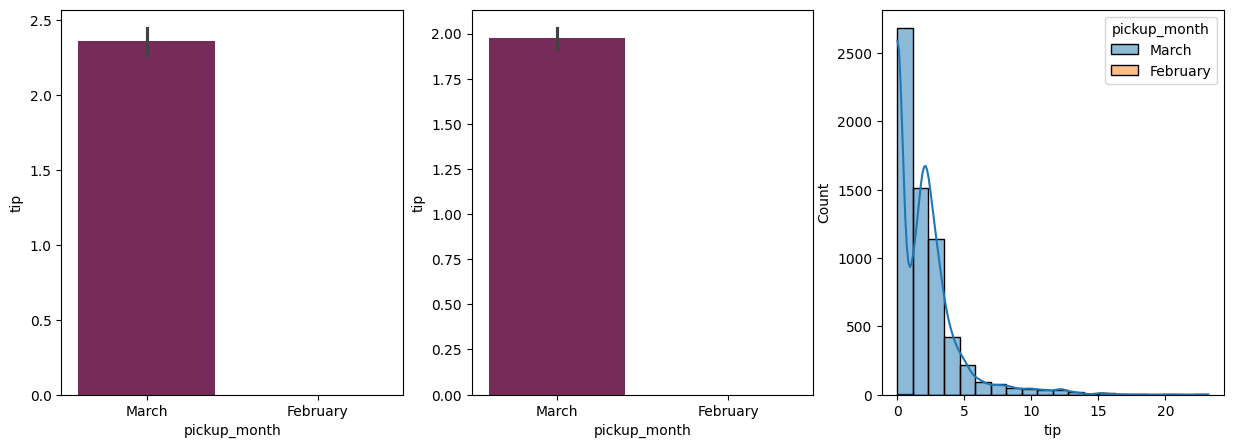

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=df['pickup_month'],y=df['tip'],estimator='std',palette='rocket')
plt.subplot(1,3,2)
sns.barplot(x=df['pickup_month'],y=df['tip'],estimator='mean',palette='rocket')
plt.subplot(1,3,3)
sns.histplot(hue=df['pickup_month'],x=df['tip'],kde=True,bins=20)

In [ ]:
df['pickup_month'].unique()

array(['March', 'February'], dtype=object)

##### T - Test (pickup_month)
    . H0 : distribution of tip for march = ditribution of tip for february
    . H1 : distribution of tip for march != ditribution of tip for february

In [ ]:
march_tip = df['tip'][df['pickup_month']=='March']
february_tip = df['tip'][df['pickup_month']=='February']

In [ ]:
# Independent T-Test
from scipy import stats


t_stat, p_val = stats.ttest_ind(march_tip,february_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by pickup_month")
else:
    print("Fail to reject null hypothesis: No significant tips difference by pickup_month")


Independent T-Test statistic: 0.8352658713084974
P-value: 0.4035995080184128
Fail to reject null hypothesis: No significant tips difference by pickup_month


In [ ]:
df['dropoff_month'].value_counts()

,count
dropoff_month,
March,6339
April,1
February,1


/tmp/ipython-input-2797425056.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df['dropoff_month'],palette='rocket')


<Axes: xlabel='dropoff_month', ylabel='count'>

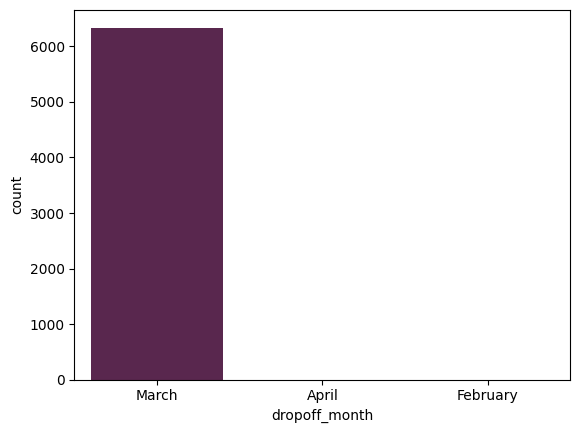

In [ ]:
sns.countplot(data=df,x=df['dropoff_month'],palette='rocket')

/tmp/ipython-input-3727792115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['dropoff_month'],y=df['tip'],estimator='std',palette='rocket')
/tmp/ipython-input-3727792115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['dropoff_month'],y=df['tip'],estimator='mean',palette='rocket')


<Axes: xlabel='tip', ylabel='Count'>

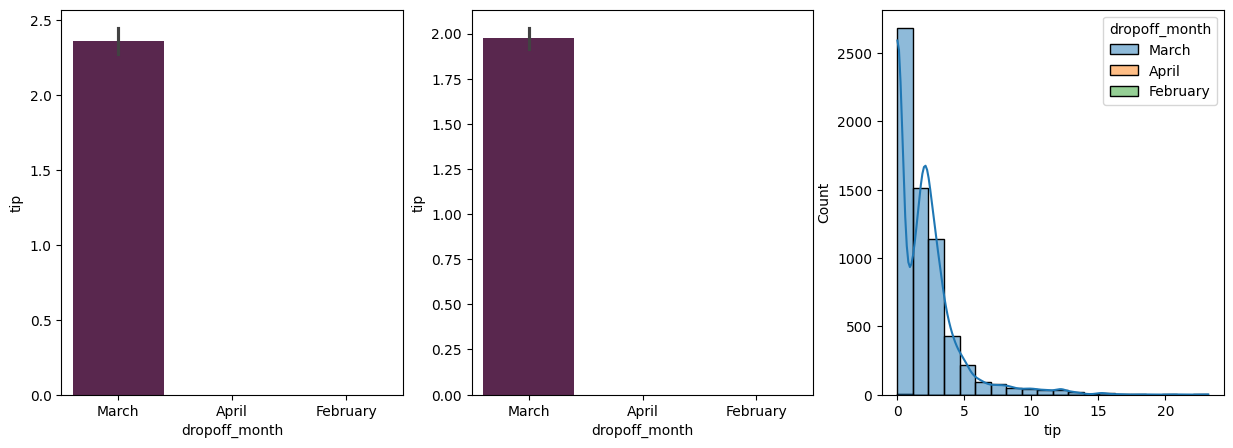

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=df['dropoff_month'],y=df['tip'],estimator='std',palette='rocket')
plt.subplot(1,3,2)
sns.barplot(x=df['dropoff_month'],y=df['tip'],estimator='mean',palette='rocket')
plt.subplot(1,3,3)
sns.histplot(hue=df['dropoff_month'],x=df['tip'],kde=True,bins=20)

##### Annova Test 3 (dropoff_month)
    . H0 : distribution of tips is the same across all dropoff_month categories
    . H1 : At least one category has a different distribution of tip across dropoff_month categories

In [ ]:
df.dropoff_month.unique()

array(['March', 'April', 'February'], dtype=object)

In [ ]:
march_tip1 = df['tip'][df['dropoff_month']=='March']
february_tip1 = df['tip'][df['dropoff_month']=='February']
april_tip1 = df['tip'][df['dropoff_month']=='April']

In [ ]:
# ANOVA Test
f_stat, p_val = stats.f_oneway(march_tip1,february_tip1,april_tip1)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tips differs by dropoff_month")
else:
    print("Fail to reject null hypothesis: No significant difference by dropoff_month")

ANOVA F-statistic: 0.6977458764114044
P-value: 0.4977441577891454
Fail to reject null hypothesis: No significant difference by dropoff_month


In [ ]:
'''
Conclusion: all the categorical columns which are new doesn't effect the tip column
'''

### EDA for the numerical columns (new)

In [ ]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,pickup_year,pickup_day,pickup_hour,dropoff_year,dropoff_hour,dropoff_minute,dropoff_second,dropoff_quarter,dropoff_day
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.0,6341.000000,6341.000000,6341.0,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263,2019.0,15.758871,13.899227,2019.0,13.941019,30.070967,29.396152,1.000158,15.761867
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000,2019.0,1.000000,0.000000,2019.0,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000,2019.0,8.000000,10.000000,2019.0,10.000000,15.000000,14.000000,1.000000,8.000000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000,2019.0,15.000000,15.000000,2019.0,15.000000,30.000000,30.000000,1.000000,15.000000
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000,2019.0,23.000000,19.000000,2019.0,19.000000,45.000000,44.000000,1.000000,23.000000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000,2019.0,31.000000,23.000000,2019.0,23.000000,59.000000,59.000000,2.000000,31.000000
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365,0.0,8.888108,6.052512,0.0,6.128049,17.330122,17.230415,0.012558,8.886406


In [ ]:
'''
pickup_year
pickup_day
pickup_hour
dropoff_year
dropoff_hour
dropoff_minute
dropoff_second
dropoff_quarter
dropoff_day
'''

'\npickup_year\npickup_day\npickup_hour\ndropoff_year\ndropoff_hour\ndropoff_minute\ndropoff_second\ndropoff_quarter\ndropoff_day\n'

In [ ]:
df['pickup_year'].value_counts()

,count
pickup_year,
2019,6341


In [ ]:
df['pickup_year'].nunique()

1

In [ ]:
df['dropoff_year'].value_counts()

,count
dropoff_year,
2019,6341


In [ ]:
df['dropoff_year'].nunique()

1

In [ ]:
#As it’s less than or equal to 1, drop it:
#df = df.drop(columns=['pickup_year'])
#df = df.drop(columns=['dropoff_year'])

<Axes: xlabel='pickup_day', ylabel='Count'>

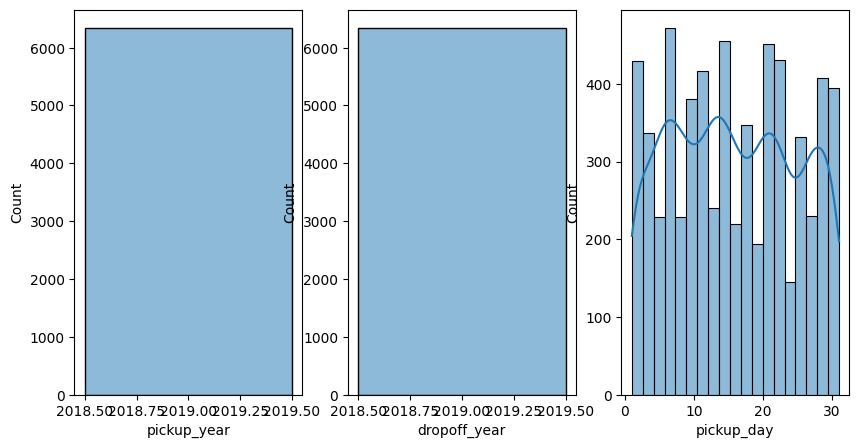

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.histplot(df['pickup_year'],kde=True)
plt.subplot(1,3,2)
sns.histplot(df['dropoff_year'],kde=True)
plt.subplot(1,3,3)
sns.histplot(df['pickup_day'],kde=True)

<Axes: xlabel='dropoff_hour', ylabel='Count'>

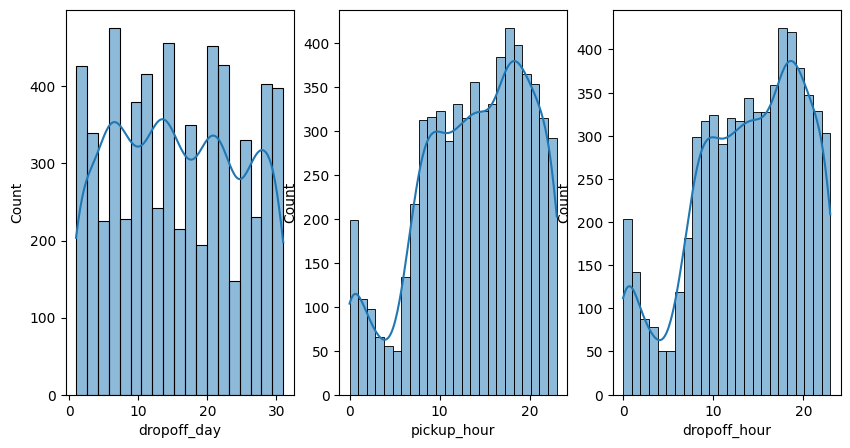

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.histplot(df['dropoff_day'],kde=True)
plt.subplot(1,3,2)
sns.histplot(df['pickup_hour'],kde=True)
plt.subplot(1,3,3)
sns.histplot(df['dropoff_hour'],kde=True)

<Axes: xlabel='dropoff_second', ylabel='Count'>

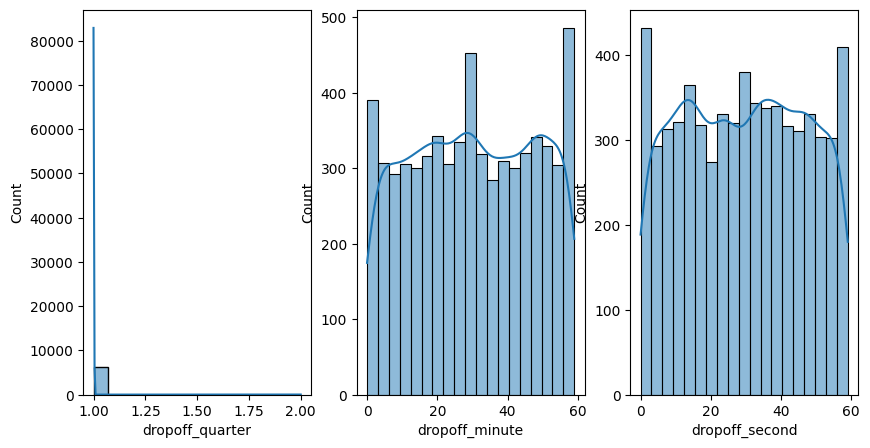

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.histplot(df['dropoff_quarter'],kde=True)
plt.subplot(1,3,2)
sns.histplot(df['dropoff_minute'],kde=True)
plt.subplot(1,3,3)
sns.histplot(df['dropoff_second'],kde=True)

#### Hypothese for correlation for numberic variables:
    . H0 : correlation is zero
    . H1 : There is significant correlation (not zero)

In [ ]:
df.pickup_day.skew()

np.float64(0.04994570013687315)

In [ ]:
df.pickup_day.kurtosis()

np.float64(-1.1765713733562717)

In [ ]:
# go for the pearson test
r, p_val = stats.pearsonr(df['tip'], df['pickup_day'])
print("P-value :",p_val)

alpha = 0.5
if p_val<alpha:
    print("Reject null hypothesis: There is significant correlation")
else:
    print('Fail to reject null Hypothesis : There is no significant correlation')

P-value : 0.15901759485800135
Reject null hypothesis: There is significant correlation


In [ ]:
df.dropoff_day.skew()

np.float64(0.050247468887452844)

In [ ]:
df.dropoff_day.kurtosis()

np.float64(-1.1763875279781784)

In [ ]:
# go for the pearson test
r, p_val = stats.pearsonr(df['tip'], df['dropoff_day'])
print("P-value :",p_val)

alpha = 0.5
if p_val<alpha:
    print("Reject null hypothesis: There is significant correlation")
else:
    print('Fail to reject null Hypothesis : There is no significant correlation')

P-value : 0.14446317138849102
Reject null hypothesis: There is significant correlation


In [ ]:
df.pickup_hour.skew()

np.float64(-0.48079237828578225)

In [ ]:
df.pickup_hour.kurtosis()

np.float64(-0.5336286870692848)

In [ ]:
r, p_val = stats.spearmanr(df['tip'], df['pickup_hour'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlation")

Spearman's rank correlation coefficient: 0.05620765514999495
P-value: 7.517078284119937e-06
Reject null hypothesis: There is significant correlation


In [ ]:
# go for the pearson test
r, p_val = stats.pearsonr(df['tip'], df['pickup_hour'])
print("P-value :",p_val)

alpha = 0.5
if p_val<alpha:
    print("Reject null hypothesis: There is significant correlation")
else:
    print('Fail to reject null Hypothesis : There is no significant correlation')

P-value : 0.0340631589058849
Reject null hypothesis: There is significant correlation


In [ ]:
df.dropoff_hour.skew()

np.float64(-0.5121914858347444)

In [ ]:
df.dropoff_hour.kurtosis()

np.float64(-0.5194809457514951)

In [ ]:
# go for the pearson test
r, p_val = stats.pearsonr(df['tip'], df['dropoff_hour'])
print("P-value :",p_val)

alpha = 0.5
if p_val<alpha:
    print("Reject null hypothesis: There is significant correlation")
else:
    print('Fail to reject null Hypothesis : There is no significant correlation')

P-value : 0.00986910678562921
Reject null hypothesis: There is significant correlation


In [ ]:
r, p_val = stats.spearmanr(df['tip'], df['dropoff_hour'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlation")

Spearman's rank correlation coefficient: 0.056776702660829036
P-value: 6.0707751854063095e-06
Reject null hypothesis: There is significant correlation


In [ ]:
df.dropoff_minute.skew()

np.float64(-0.019218697392573317)

In [ ]:
df.dropoff_minute.kurtosis()

np.float64(-1.1896281986842923)

In [ ]:
r, p_val = stats.pearsonr(df['tip'], df['dropoff_minute'])
print("P-value :",p_val)

alpha = 0.5
if p_val<alpha:
    print("Reject null hypothesis: There is significant correlation")
else:
    print('Fail to reject null Hypothesis : There is no significant correlation')

P-value : 0.6193247942125925
Fail to reject null Hypothesis : There is no significant correlation


In [ ]:
df.dropoff_second.skew()

np.float64(-0.002813195253671533)

In [ ]:
df.dropoff_second.kurtosis()

np.float64(-1.1902322051756942)

In [ ]:
r, p_val = stats.pearsonr(df['tip'], df['dropoff_second'])
print("P-value :",p_val)

alpha = 0.5
if p_val<alpha:
    print("Reject null hypothesis: There is significant correlation")
else:
    print('Fail to reject null Hypothesis : There is no significant correlation')

P-value : 0.7155622012526754
Fail to reject null Hypothesis : There is no significant correlation


In [ ]:
df.dropoff_quarter.skew()

np.float64(79.6303962064738)

In [ ]:
df.dropoff_quarter.kurtosis()

np.float64(6340.999999999999)

In [ ]:
r, p_val = stats.spearmanr(df['tip'], df['dropoff_quarter'])
print("Spearman's rank correlation coefficient:", r)
print("P-value:", p_val)

alpha = 0.5
if p_val < alpha :
    print("Reject null hypothesis: There is significant correlation")
else:
    print("Fail to reject null hypothesis: There is no significant correlation")

Spearman's rank correlation coefficient: -0.014378341502159876
P-value: 0.25229761827973424
Reject null hypothesis: There is significant correlation


In [ ]:
df.drop(columns=['pickup_month','pickup_dayname','pickup_year','dropoff_dayname','dropoff_month','dropoff_year','dropoff_minute','dropoff_second'],inplace = True)

In [ ]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough', 'pickup_day', 'pickup_hour',
       'dropoff_hour', 'dropoff_quarter', 'dropoff_day'],
      dtype='object')

In [ ]:
df.drop(columns=['pickup','dropoff'],inplace=True)

In [ ]:
df.shape

(6341, 17)

## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()


In [ ]:
df.describe(include="object")

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6341,6341,6341,6341,6341,6341
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5373,4546,227,244,5226,5172


In [ ]:
cat=['color','payment','pickup_zone','pickup_borough','dropoff_borough','dropoff_zone']
for i in cat:
    df[i]=lb.fit_transform(df[i])

In [ ]:
df.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,pickup_hour,dropoff_hour,dropoff_quarter,dropoff_day
0,1,1.60,7.0,2.15,0.0,12.95,1,1,99,176,2,2,23,20,20,1,23
1,1,0.79,5.0,0.00,0.0,9.30,1,0,174,182,2,2,4,16,16,1,4
2,1,1.37,7.5,2.36,0.0,14.16,1,1,1,190,2,2,27,17,18,1,27
3,1,7.70,27.0,6.15,0.0,36.95,1,1,86,202,2,2,10,1,1,1,10
4,3,2.16,9.0,1.10,0.0,13.40,1,1,116,202,2,2,30,13,13,1,30


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
cont=['fare','tolls','total','distance']

In [ ]:
st=StandardScaler()
df[cont]=st.fit_transform(df[cont])
df.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,pickup_hour,dropoff_hour,dropoff_quarter,dropoff_day
0,1,-0.375780,-0.549175,2.15,-0.229932,-0.413941,1,1,99,176,2,2,23,20,20,1,23
1,1,-0.593552,-0.735718,0.00,-0.229932,-0.695808,1,0,174,182,2,2,4,16,16,1,4
2,1,-0.437617,-0.502540,2.36,-0.229932,-0.320500,1,1,1,190,2,2,27,17,18,1,27
3,1,1.264233,1.316252,6.15,-0.229932,1.439435,1,1,86,202,2,2,10,1,1,1,10
4,3,-0.225221,-0.362633,1.10,-0.229932,-0.379190,1,1,116,202,2,2,30,13,13,1,30


In [ ]:
X = df.drop('tip',axis=1)
y = df.tip

In [ ]:
X.shape

(6341, 16)

In [ ]:
y.shape

(6341,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Model Selection

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Training Score

In [ ]:
y_train_pred = model.predict(X_train)
train_score = model.score(X_train,y_train)
print("Model Training Score : ",train_score)

Model Training Score :  0.9239198209553678


## Testing Score

In [ ]:
y_train_pred = model.predict(X_test)
test_score = model.score(X_test,y_test)
print("Model Testing Score : ",test_score)

Model Testing Score :  0.7763024695026548


In [ ]:
# metrics calculation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(y_test,y_train_pred)

1.2714265569897436

In [ ]:
mean_absolute_error(y_test,y_train_pred)

0.45306851535607556

In [ ]:
r2_score(y_test,y_train_pred)

0.7763024695026548

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive/MyDrive')

['Colab Notebooks',
 'IMG-20240804-WA0000.jpg',
 'S50242200390405.pdf',
 'CSE BTech 3rd &4th years R22 CS and SYLLABUS 2024-25  (6-02-2025).pdf.gdrive',
 'Apriori_2.py',
 'Copy of CSE BTech 3rd &4th years R22 CS and SYLLABUS 2024-25  (6-02-2025).pdf.gdrive',
 '23B81A0523_DS 1.pdf',
 'report_1758117564972.pdf',
 'Screenshot_20250917-194243 (2).png',
 'Screenshot_20250917-194243 (1).png',
 'Screenshot_20250917-194243.png',
 'IMG-20250919-WA0014.jpg',
 'Screenshot_20250919-202335 (2).png',
 'Screenshot_20250919-202335 (1).png',
 'Screenshot_20250919-202335.png',
 'report_1758295583089.pdf',
 'Screenshot_20250920-204323 (2).png',
 'Screenshot_20250920-204323 (1).png',
 'Screenshot_20250920-204323.png',
 'report_1758381299832.pdf',
 'Screenshot_20250922-202350 (2).png',
 'Screenshot_20250922-202350 (1).png',
 'Screenshot_20250922-202350.png',
 'report_1758552862123.pdf',
 'Audio from Kiran',
 'Abstract552[1].pdf',
 'Abstract552[1] (2).gdoc',
 'Abstract552[1] (1).gdoc',
 'Abstract552[1].gdoc

In [ ]:
path = '/content/drive/MyDrive/Position_Salaries.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [253]:
X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

In [254]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)



LinearRegression()

In [255]:
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

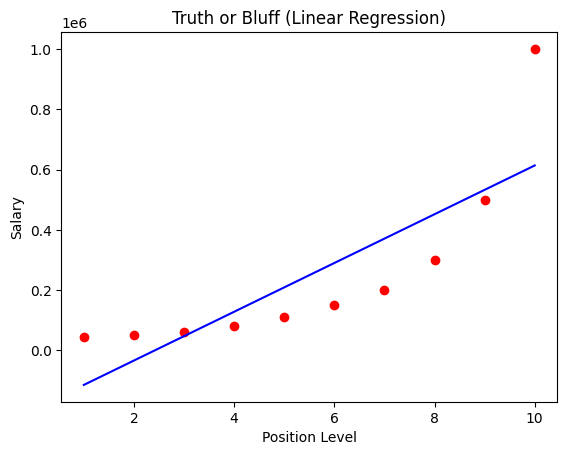

In [256]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

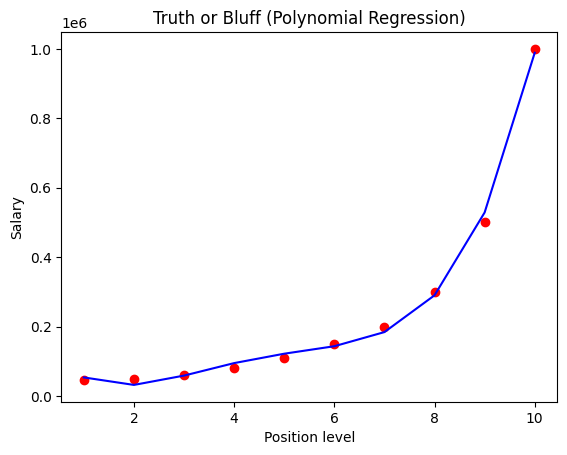

In [257]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Text(0, 0.5, 'Salary')

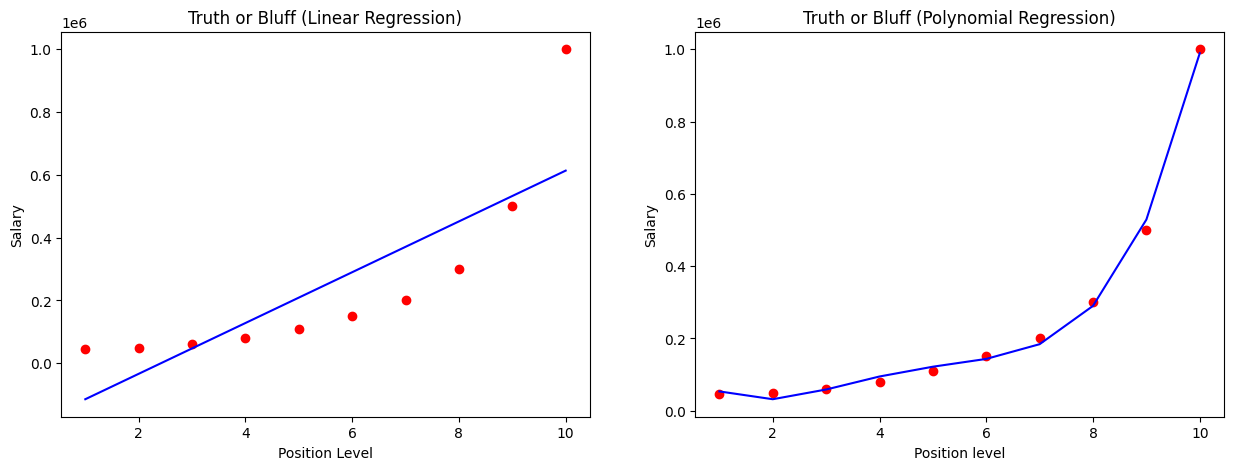

In [259]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.subplot(1,2,2)
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

### Predictions

In [260]:
# predicting a new result with linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print(linear_prediction)

[330378.78787879]


In [261]:
# predict on full data set using polynomial features
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print(poly_prediction)

[158862.45265155]


In [264]:
# Metrics calucation and printing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_linear = lin_reg.predict(X)
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform(X))
print("Linear Regression")
print("MSE : ",mean_squared_error(y,y_pred_linear))
print("MAE : ",mean_absolute_error(y,y_pred_linear))
print("R2 Score : ",r2_score(y,y_pred_linear))
print("Polynomial Regression")
print("MSE : ",mean_squared_error(y,y_pred_poly))
print("MAE : ",mean_absolute_error(y,y_pred_poly))
print("R2 Score : ",r2_score(y,y_pred_poly))

Linear Regression
MSE :  26695878787.878784
MAE :  128454.54545454546
R2 Score :  0.6690412331929895
Polynomial Regression
MSE :  210343822.84381685
MAE :  12681.818181828514
R2 Score :  0.9973922891706614
